In [ ]:
import investpy

# Version 1 


## Crypto
* Bitcoin

## Alternative
* Gold

## Stock Indice
* Dow 30

--------------------------------------------------------------------------

--------------------------------------------------------------------------
# Version 2 


## Crypto
* Bitcoin
* Ethereum
* Binance Coin
* Tether
* Polkadot
* Cardano
* XRP
* Uniswap
* Litecoin
* Chainlink
* THETA
* Filecoin
* USD Coin
* Bitcoin Cash
* Stellar
* BitTorrent
* Klaytn
* TRON
* Wrapped Bitcoin
* Dogecoin

## Alternative
* Gold
* [Find] silver
* [Find] Yield10 year
* [Find] Yield2 year
* [Find] Yield3 month
* [Find] agriculture price 3 product
* [Find] Inflation Bond
* [Find] oil wti 
* [Find] ??? unemployment rate/ GDP/ Nonfarm payroll




## Stock Indice
####  US
* Dow 30
* S&P 500

####  United Kingdom
* FTSE 100


#### Australia
* S&P/ASX 200

#### Canada
* S&P/TSX

#### China
* CSI 1000
* Shanghai

#### France
* CAC 40
* CAC All Shares


#### Germany
* DAX
* Euro Stoxx 50

#### Hong Kong
* FTSE China 50
* Hang Seng

#### India
* BSE Sensex
* Nifty 50

#### Japan
* Nikkei 225

#### South Korea
* KOSPI

#### Switzerland
* SMI 

#### Thailand
* SET



# Plan and modeling outline

1. Path Plot
2. Correlation PLot of return [Monthly]
3. Model1 : Regression on Error Term
4. Model2 : PCA orthogonal variable
5. Model3 : Impulse respond Function
6. Model4 : Predictability on Bitcoin by gold and stock [Inflation and Y]

# Version 1 

In [95]:
import investpy

Stock_DJ = investpy.indices.get_index_historical_data(index = "Dow 30", country = "United States", from_date='01/01/1990',  to_date='01/01/2022')
Crypto_BTC = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/1990', to_date='01/01/2022')
Alter_GOLD = investpy.get_commodity_historical_data(commodity='gold', from_date='01/01/1990', to_date='01/01/2022')

Stock_DJ['return'] = np.log(Stock_DJ['Close']) - np.log(Stock_DJ['Close']).shift(1) 
Crypto_BTC['return'] = np.log(Crypto_BTC['Close']) - np.log(Crypto_BTC['Close']).shift(1) 
Alter_GOLD['return'] = np.log(Alter_GOLD['Close']) - np.log(Alter_GOLD['Close']).shift(1) 




In [97]:
# prep
import pandas as pd
import numpy as np

In [242]:
Alter_GOLD['date'] = Alter_GOLD.index
Alter_GOLD['year'] = Alter_GOLD.date.dt.year.astype(int) 
Alter_GOLD['par_month'] = (Alter_GOLD.date.dt.year.astype(str) + Alter_GOLD.date.dt.month.astype(str).str.zfill(2)).astype(int)
Alter_GOLD['par_week'] = (Alter_GOLD.date.dt.year.astype(str) + Alter_GOLD.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)


Stock_DJ['date'] = Stock_DJ.index
Stock_DJ['year'] = Stock_DJ.date.dt.year.astype(int) 
Stock_DJ['par_month'] = (Stock_DJ.date.dt.year.astype(str) + Stock_DJ.date.dt.month.astype(str).str.zfill(2)).astype(int)
Stock_DJ['par_week'] = (Stock_DJ.date.dt.year.astype(str) + Stock_DJ.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)

Crypto_BTC['date'] = Crypto_BTC.index
Crypto_BTC['year'] = Crypto_BTC.date.dt.year.astype(int)
Crypto_BTC['par_month'] = (Crypto_BTC.date.dt.year.astype(str) + Crypto_BTC.date.dt.month.astype(str).str.zfill(2)).astype(int)
Crypto_BTC['par_week'] = (Crypto_BTC.date.dt.year.astype(str) + Crypto_BTC.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)


In [243]:
Alter_GOLD

,Open,High,Low,Close,Volume,Currency,return,date,par_month,year,par_week
Date,,,,,,,,,,,
1990-01-02,399.6,399.6,399.6,399.6,207,USD,NaN,1990-01-02,199001,1990,199001
1990-01-03,393.0,394.0,393.0,394.0,505,USD,-0.014113,1990-01-03,199001,1990,199001
1990-01-04,398.6,398.6,398.6,398.6,0,USD,0.011607,1990-01-04,199001,1990,199001
1990-01-05,406.3,406.3,406.3,406.3,1,USD,0.019133,1990-01-05,199001,1990,199001
1990-01-08,404.7,404.7,403.0,403.0,32,USD,-0.008155,1990-01-08,199001,1990,199002
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,1725.5,1735.5,1718.8,1732.3,172944,USD,0.004165,2021-03-26,202103,2021,202112
2021-03-29,1731.5,1732.6,1703.3,1712.2,135457,USD,-0.011671,2021-03-29,202103,2021,202113
2021-03-30,1711.0,1712.6,1676.5,1683.9,25316,USD,-0.016667,2021-03-30,202103,2021,202113


In [244]:
Stock_DJ

,Open,High,Low,Close,Volume,Currency,return,date,par_month,year,par_week
Date,,,,,,,,,,,
2007-01-04,12467.32,12510.26,12405.47,12480.69,0,USD,NaN,2007-01-04,200701,2007,200701
2007-01-05,12480.05,12504.40,12326.79,12398.01,0,USD,-0.006647,2007-01-05,200701,2007,200701
2007-01-08,12393.93,12445.37,12337.53,12423.49,0,USD,0.002053,2007-01-08,200701,2007,200702
2007-01-09,12424.77,12516.66,12337.85,12416.60,0,USD,-0.000555,2007-01-09,200701,2007,200702
2007-01-10,12417.00,12487.18,12313.01,12442.16,0,USD,0.002056,2007-01-10,200701,2007,200702
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,32681.07,33098.83,32681.07,33072.88,383452288,USD,0.013804,2021-03-26,202103,2021,202112
2021-03-29,33087.55,33259.00,32905.13,33171.37,351610592,USD,0.002974,2021-03-29,202103,2021,202113
2021-03-30,33127.88,33170.93,32988.92,33066.96,309568608,USD,-0.003153,2021-03-30,202103,2021,202113


In [101]:
Crypto_BTC

,Open,High,Low,Close,Volume,Currency,return,date,par_month
Date,,,,,,,,,
2010-07-18,0.0,0.1,0.1,0.1,75,USD,NaN,2010-07-18,201007
2010-07-19,0.1,0.1,0.1,0.1,574,USD,0.000000,2010-07-19,201007
2010-07-20,0.1,0.1,0.1,0.1,262,USD,0.000000,2010-07-20,201007
2010-07-21,0.1,0.1,0.1,0.1,575,USD,0.000000,2010-07-21,201007
2010-07-22,0.1,0.1,0.1,0.1,2160,USD,0.000000,2010-07-22,201007
...,...,...,...,...,...,...,...,...,...
2021-03-31,58771.4,59795.6,56991.6,58763.7,98064,USD,-0.000129,2021-03-31,202103
2021-04-01,58763.2,59406.5,58040.7,58718.3,69044,USD,-0.000773,2021-04-01,202104
2021-04-02,58718.2,60134.9,58466.5,58977.3,72374,USD,0.004401,2021-04-02,202104


In [104]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Crypto_BTC_grp = Crypto_BTC.groupby(['par_month']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "BTC_P"
name_agg = ["par_month"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "BTC_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Crypto_BTC_grp.columns = name_agg

In [113]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Alter_GOLD_grp = Alter_GOLD.groupby(['par_month']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "GOLD_P"
name_agg = ["par_month"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "GOLD_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Alter_GOLD_grp.columns = name_agg

In [114]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Stock_DJ_grp = Stock_DJ.groupby(['par_month']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "DOW_P"
name_agg = ["par_month"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "DOW_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Stock_DJ_grp.columns = name_agg

In [115]:
Crypto_BTC_grp

,par_month,BTC_P_last,BTC_R_std,BTC_R_mean
0,201007,0.1,0.000000,0.000000
1,201008,0.1,0.000000,0.000000
2,201009,0.1,0.000000,0.000000
3,201010,0.2,0.124493,0.022360
4,201011,0.2,0.199303,0.000000
5,201012,0.3,0.221684,0.013080
6,201101,0.5,0.098261,0.016478
7,201102,0.9,0.105675,0.020992
8,201103,0.8,0.050607,-0.003799
9,201104,3.5,0.096595,0.049197


In [109]:
Alter_GOLD_grp

,par_month,BTC_P_last,BTC_R_std,BTC_R_mean
0,199001,412.4,0.009755,0.001501
1,199002,406.1,0.007637,-0.000810
2,199003,370.2,0.014288,-0.004207
3,199004,368.4,0.007535,-0.000244
4,199005,364.3,0.008671,-0.000509
...,...,...,...,...
371,202012,1895.1,0.008608,0.002825
372,202101,1850.3,0.013356,-0.001087
373,202102,1728.8,0.011385,-0.003234
374,202103,1713.8,0.009132,-0.000379


In [110]:
Stock_DJ_grp

,par_month,BTC_P_last,BTC_R_std,BTC_R_mean
0,200701,12621.69,0.004696,0.000624
1,200702,12268.63,0.008526,-0.001493
2,200703,12354.35,0.007502,0.000316
3,200704,13062.91,0.004894,0.002788
4,200705,13627.64,0.004649,0.001924
...,...,...,...,...
167,202012,30606.48,0.004882,0.001461
168,202101,29982.62,0.009235,-0.001084
169,202102,30932.37,0.008114,0.001641
170,202103,32981.55,0.008557,0.002789


In [138]:
# pd.set_option("display.max_rows", 150)
prep_merge = pd.merge( Crypto_BTC_grp , 
pd.merge(Stock_DJ_grp , 
         Alter_GOLD_grp , 
         how = "left", 
         on = ["par_month"]),
         how = "left" , on = ["par_month"])

prep_merge_r = np.log(prep_merge.filter(regex='last')) - np.log(prep_merge.filter(regex='last').shift(1))

concatenated_prep = pd.concat([prep_merge[[i for i in prep_merge.columns if i not in prep_merge_r.columns]], prep_merge_r], axis=1)


In [140]:
concatenated_prep

,par_month,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
0,201007,0.000000,0.000000,0.011110,0.003257,0.011175,-0.002504,NaN,NaN,NaN
1,201008,0.000000,0.000000,0.009981,-0.002003,0.004573,0.002492,0.000000,-0.044070,0.054829
2,201009,0.000000,0.000000,0.008449,0.003542,0.005991,0.002217,0.000000,0.074383,0.046564
3,201010,0.124493,0.022360,0.006656,0.001436,0.011035,0.001762,0.693147,0.030162,0.037004
4,201011,0.199303,0.000000,0.008728,-0.000484,0.013145,0.000969,0.000000,-0.010159,0.020350
5,201012,0.221684,0.013080,0.005220,0.002301,0.008595,0.001170,0.405465,0.050622,0.025731
6,201101,0.098261,0.016478,0.005087,0.001340,0.010592,-0.003170,0.510826,0.026796,-0.063399
7,201102,0.105675,0.020992,0.006385,0.001541,0.005722,0.002898,0.587787,0.027733,0.055061
8,201103,0.050607,-0.003799,0.010104,0.000331,0.008799,0.000904,-0.117783,0.007609,0.020786
9,201104,0.096595,0.049197,0.005959,0.001953,0.006882,0.003912,1.475907,0.039066,0.078239


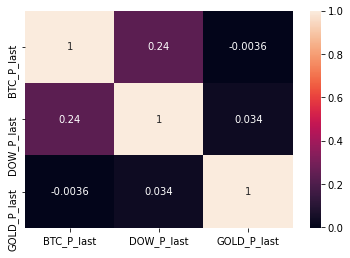

In [141]:
### LAST return CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='last')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

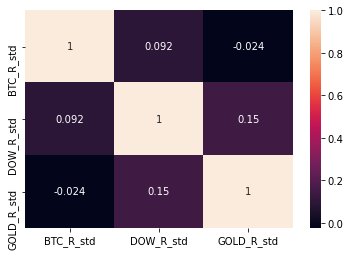

In [153]:
### vol return [on daily] CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='std')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

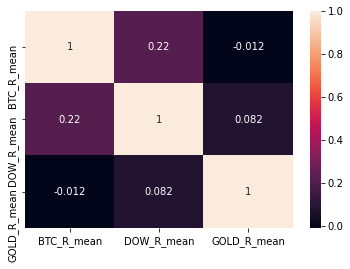

In [154]:
### avg daily return on month: CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='mean')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
# Bitcoin and Dow are somehow high correlated \\



In [ ]:
# regression on error term

In [144]:
from statsmodels.regression.linear_model import OLS

In [156]:
model_df= concatenated_prep.dropna()

In [175]:
ols_1 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last').filter(regex='DOW'))
results_1 = ols_1.fit()

In [158]:
print(results_1.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              11.26
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                     0.00104
Time:                        17:15:12   Log-Likelihood:                         -40.127
No. Observations:                 128   AIC:                                      82.25
Df Residuals:                     127   BIC:                                      85.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [171]:
e_1 = model_df.filter(regex='last').filter(regex='BTC').iloc[:,0] - results_1.predict(model_df.filter(regex='last').filter(regex='DOW')) 

In [174]:

ols_1e = OLS(e_1 , model_df.filter(regex='last').filter(regex='GOLD'))
results_1e = ols_1e.fit()

In [176]:
print(results_1e.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                          0.0003269
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.986
Time:                        17:17:53   Log-Likelihood:                         -40.127
No. Observations:                 128   AIC:                                      82.25
Df Residuals:                     127   BIC:                                      85.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [179]:

ols_1e = OLS(e_1 ,   model_df.filter(regex='last').filter(regex='GOLD') )
results_1e = ols_1e.fit()

In [180]:
print(results_1e.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                          0.0003269
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.986
Time:                        17:19:32   Log-Likelihood:                         -40.127
No. Observations:                 128   AIC:                                      82.25
Df Residuals:                     127   BIC:                                      85.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [181]:
# The substition effect is not strong , the compliment effect bet dow and bitcoin is sig

In [ ]:
#check bitcoin and gold , dow and gold

In [185]:
ols_2 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last').filter(regex='GOLD'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                            0.02825
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.867
Time:                        17:21:50   Log-Likelihood:                         -45.550
No. Observations:                 128   AIC:                                      93.10
Df Residuals:                     127   BIC:                                      95.95
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [187]:
ols_2 = OLS(model_df.filter(regex='last').filter(regex='GOLD') , model_df.filter(regex='last').filter(regex='DOW'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.2796
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.598
Time:                        17:23:19   Log-Likelihood:                          206.30
No. Observations:                 128   AIC:                                     -410.6
Df Residuals:                     127   BIC:                                     -407.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [194]:
ols_3 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last')[[i for i in model_df.filter(regex='last').columns if i not in model_df.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              5.586
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                     0.00474
Time:                        17:32:15   Log-Likelihood:                         -40.127
No. Observations:                 128   AIC:                                      84.25
Df Residuals:                     126   BIC:                                      89.96
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

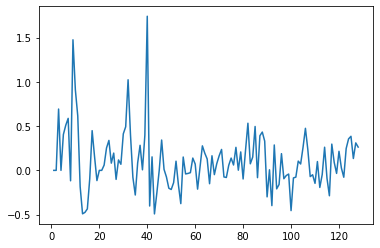

In [189]:
plt.plot(model_df.filter(regex='last').filter(regex='BTC'))

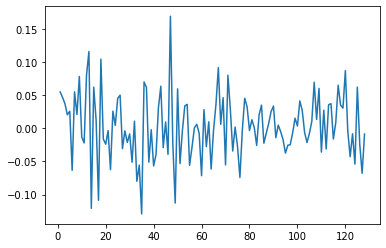

In [190]:
plt.plot(model_df.filter(regex='last').filter(regex='GOLD'))

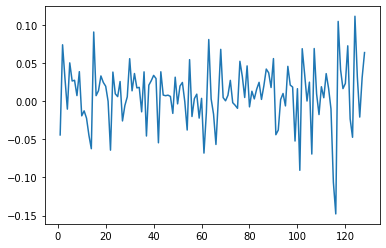

In [196]:
plt.plot(model_df.filter(regex='last').filter(regex='DOW'))

In [ ]:
# DO PCA 

In [ ]:
model_df.filter(regex='last')

In [197]:
from sklearn.preprocessing import StandardScaler

In [199]:
x  = model_df.filter(regex='last')
x = StandardScaler().fit_transform(x)


In [208]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

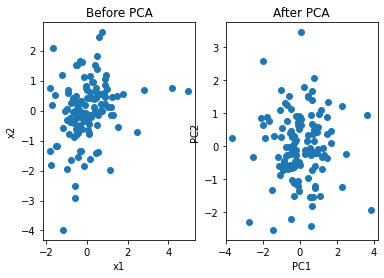

In [210]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [211]:
print(pca.explained_variance_ratio_)


[0.4124012  0.33364853]


In [214]:
model_df.filter(regex='last').columns

Index(['BTC_P_last', 'DOW_P_last', 'GOLD_P_last'], dtype='object')

In [213]:
print(abs( pca.components_ ))

# Bitcoin and Dow tend to goes in the same direction 

[[0.70030999 0.70774699 0.09305973]
 [0.14489923 0.01328874 0.98935718]]


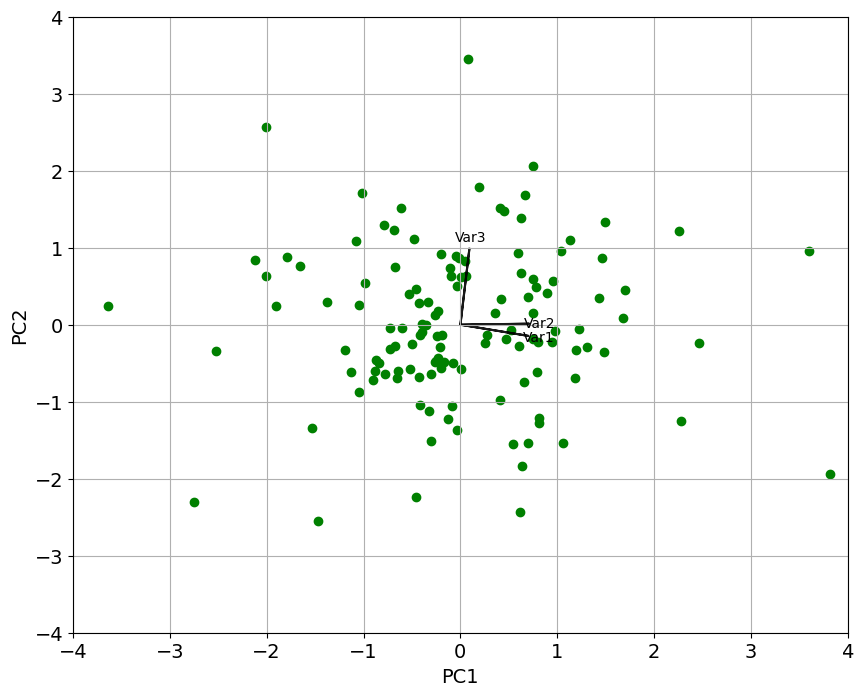

In [218]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()

In [ ]:
# DO linear model with GOLD bitcoin DOW with lag monthly
# DO linear model with GOLD bitcoin DOW with lag weekly 
# DO linear model with GOLD bitcoin DOW with lag weekly only year 2018-202


In [245]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Crypto_BTC_grp = Crypto_BTC.groupby(['par_week']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "BTC_P"
name_agg = ["par_week"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "BTC_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Crypto_BTC_grp.columns = name_agg

In [246]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Alter_GOLD_grp = Alter_GOLD.groupby(['par_week']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "GOLD_P"
name_agg = ["par_week"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "GOLD_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Alter_GOLD_grp.columns = name_agg

In [247]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Stock_DJ_grp = Stock_DJ.groupby(['par_week']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "DOW_P"
name_agg = ["par_week"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "DOW_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Stock_DJ_grp.columns = name_agg


In [248]:
# pd.set_option("display.max_rows", 150)
prep_merge = pd.merge( Crypto_BTC_grp , 
pd.merge(Stock_DJ_grp , 
         Alter_GOLD_grp , 
         how = "left", 
         on = ["par_week"]),
         how = "left" , on = ["par_week"])

prep_merge_r = np.log(prep_merge.filter(regex='last')) - np.log(prep_merge.filter(regex='last').shift(1))

concatenated_prep = pd.concat([prep_merge[[i for i in prep_merge.columns if i not in prep_merge_r.columns]], prep_merge_r], axis=1)


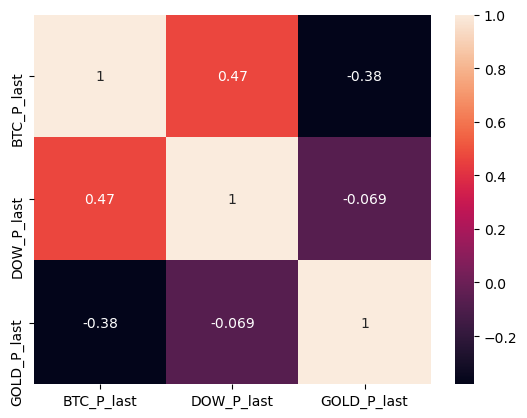

In [249]:
### LAST return CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='last')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

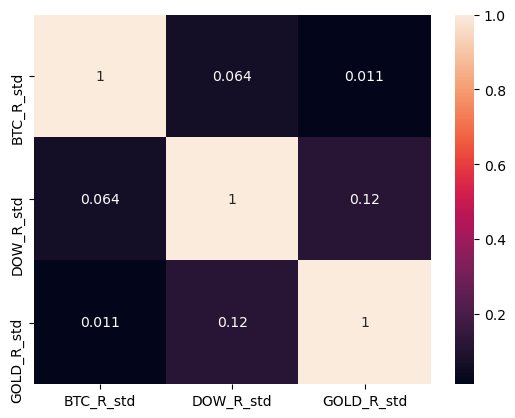

In [250]:
### vol return [on daily] CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='std')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

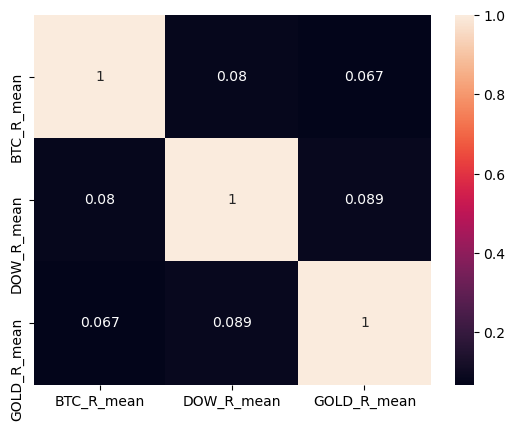

In [251]:
### avg daily return on month: CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='mean')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [252]:
from statsmodels.regression.linear_model import OLS

In [254]:

model_df= concatenated_prep.dropna()

ols_1 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last').filter(regex='DOW'))
results_1 = ols_1.fit()

print(results_1.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              157.6
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    5.30e-32
Time:                        18:30:22   Log-Likelihood:                         -67.013
No. Observations:                 557   AIC:                                      136.0
Df Residuals:                     556   BIC:                                      140.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [255]:
e_1 = model_df.filter(regex='last').filter(regex='BTC').iloc[:,0] - results_1.predict(model_df.filter(regex='last').filter(regex='DOW')) 



ols_1e = OLS(e_1 , model_df.filter(regex='last').filter(regex='GOLD'))
results_1e = ols_1e.fit()


print(results_1e.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              100.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    8.62e-22
Time:                        18:30:32   Log-Likelihood:                         -20.884
No. Observations:                 557   AIC:                                      43.77
Df Residuals:                     556   BIC:                                      48.09
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
# Short term substituion is strong

In [257]:


ols_1e = OLS(  model_df.filter(regex='last').filter(regex='GOLD'),e_1   )
results_1e = ols_1e.fit()


print(results_1e.summary())

                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              100.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    8.62e-22
Time:                        18:31:50   Log-Likelihood:                          1108.6
No. Observations:                 557   AIC:                                     -2215.
Df Residuals:                     556   BIC:                                     -2211.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [258]:

ols_2 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last').filter(regex='GOLD'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.142
Model:                            OLS   Adj. R-squared (uncentered):              0.140
Method:                 Least Squares   F-statistic:                              91.83
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    3.11e-20
Time:                        18:31:58   Log-Likelihood:                         -93.942
No. Observations:                 557   AIC:                                      189.9
Df Residuals:                     556   BIC:                                      194.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [259]:
ols_2 = OLS(model_df.filter(regex='last').filter(regex='GOLD') , model_df.filter(regex='last').filter(regex='DOW'))
results_2 = ols_2.fit()
print(results_2.summary())


                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              2.532
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.112
Time:                        18:32:06   Log-Likelihood:                          1063.7
No. Observations:                 557   AIC:                                     -2125.
Df Residuals:                     556   BIC:                                     -2121.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [260]:

ols_3 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last')[[i for i in model_df.filter(regex='last').columns if i not in model_df.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.340
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              143.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    7.30e-51
Time:                        18:32:10   Log-Likelihood:                         -20.655
No. Observations:                 557   AIC:                                      45.31
Df Residuals:                     555   BIC:                                      53.96
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [261]:
model_df.filter(regex='last')


,BTC_P_last,DOW_P_last,GOLD_P_last
1,0.000000,0.031843,-0.000253
2,0.000000,0.003956,-0.005065
3,0.000000,0.017768,0.018197
4,0.000000,-0.033444,0.009511
5,0.000000,-0.008728,0.010073
...,...,...,...
556,0.121178,0.018067,-0.017682
557,0.147984,0.039907,0.012462
558,-0.029701,-0.004607,0.012654
559,-0.028612,0.013544,-0.005412


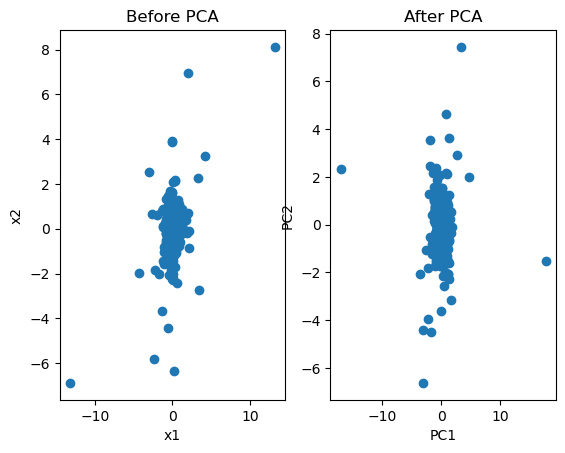

In [266]:




from sklearn.preprocessing import StandardScaler


x  = model_df.filter(regex='last')
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_new = pca.fit_transform(x)


fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()


In [267]:


print(pca.explained_variance_ratio_)


[0.54539166 0.31094086 0.14366748]


In [268]:


model_df.filter(regex='last').columns




Index(['BTC_P_last', 'DOW_P_last', 'GOLD_P_last'], dtype='object')

In [269]:

print(abs( pca.components_ ))


[[0.68694096 0.5549457  0.46919867]
 [0.02409081 0.62790019 0.77792094]
 [0.72631381 0.54568913 0.41796127]]


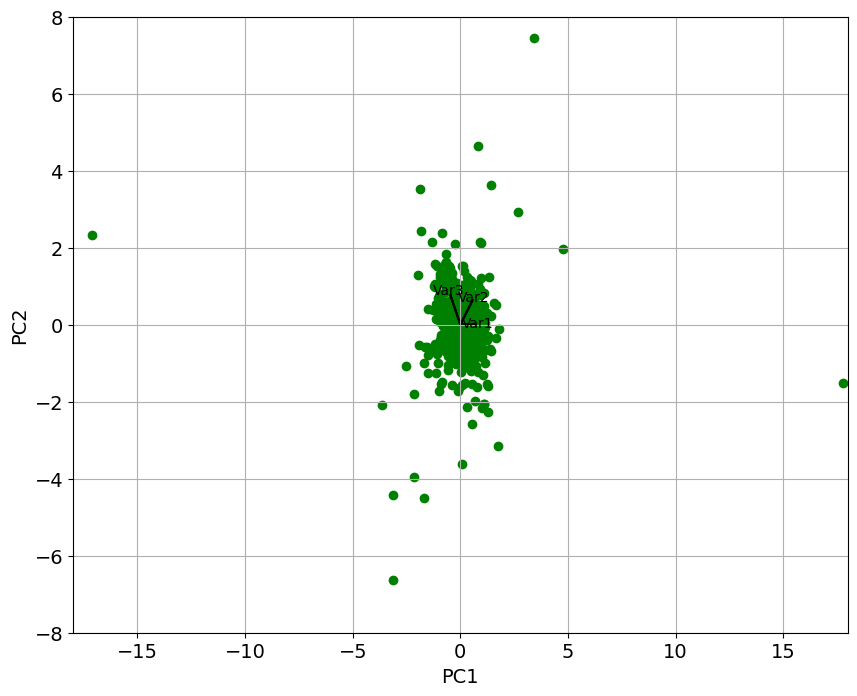

In [270]:



def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()



In [ ]:
# With delete outlier 

In [271]:
model_df_del_outlier = 


BTC_P_last	DOW_P_last	GOLD_P_last

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
1,201029,0.000000,0.000000,0.011022,0.006369,0.006124,-0.000051,0.000000,0.031843,-0.000253
2,201030,0.000000,0.000000,0.005333,0.000791,0.012712,-0.001013,0.000000,0.003956,-0.005065
3,201031,0.000000,0.000000,0.009485,0.003554,0.002474,0.003639,0.000000,0.017768,0.018197
4,201032,0.000000,0.000000,0.011101,-0.006689,0.007211,0.001902,0.000000,-0.033444,0.009511
5,201033,0.000000,0.000000,0.008840,-0.001746,0.004765,0.002015,0.000000,-0.008728,0.010073
...,...,...,...,...,...,...,...,...,...,...
556,202109,0.045249,0.017311,0.014173,0.003613,0.006571,-0.003536,0.121178,0.018067,-0.017682
557,202110,0.034166,0.021141,0.005004,0.007981,0.012773,0.002492,0.147984,0.039907,0.012462
558,202111,0.030261,-0.004243,0.006021,-0.000921,0.003212,0.002531,-0.029701,-0.004607,0.012654
559,202112,0.041489,-0.004087,0.008527,0.002709,0.005386,-0.001082,-0.028612,0.013544,-0.005412


In [272]:
model_df['BTC_P_last'].max()

4.0967049583736

In [275]:
model_df.describe()

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,201566.511670,0.042954,0.003438,0.008080,0.000446,0.011724,0.000200,0.024265,0.002138,0.000600
std,310.844155,0.053692,0.021013,0.007427,0.004819,0.010048,0.005653,0.308498,0.030283,0.035948
min,201029.000000,0.000000,-0.112645,0.000399,-0.037996,0.000721,-0.020263,-4.045785,-0.206163,-0.319837
25%,201312.000000,0.017535,-0.004243,0.003885,-0.001521,0.005648,-0.002905,-0.031585,-0.008198,-0.015127
50%,201548.000000,0.029331,0.002286,0.006300,0.000691,0.008544,0.000280,0.014817,0.003092,0.001015
75%,201831.000000,0.048243,0.011298,0.009959,0.002802,0.013616,0.003013,0.079088,0.013771,0.015390
max,202113.000000,0.648919,0.099021,0.085420,0.029818,0.078691,0.024421,4.096705,0.247818,0.322914


In [ ]:
4.096705

In [278]:
np.percentile(model_df['BTC_P_last'], 99)

0.6577564182688993

In [279]:
np.percentile(model_df['DOW_P_last'], 99)

0.073744976190116

In [280]:
np.percentile(model_df['GOLD_P_last'], 99)

0.09642791651624646

In [322]:
model_df_del_outline = model_df[    (abs(model_df['BTC_P_last']) 
         < abs(np.percentile(model_df['BTC_P_last'], 99))   )     
        &
         (
             abs(model_df['DOW_P_last']) 
         < abs(np.percentile(model_df['DOW_P_last'], 99))
         )
         &
         (
         abs(model_df['DOW_P_last']) 
         < abs(np.percentile(model_df['GOLD_P_last'], 99))
         )
        
        
        ]



In [323]:
model_df_del_outline.describe()

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,201564.633333,0.041953,0.003425,0.007673,0.000479,0.011552,0.000167,0.022555,0.002209,0.000401
std,309.312108,0.052900,0.019548,0.005520,0.003992,0.009969,0.005510,0.140101,0.019452,0.028130
min,201029.000000,0.000000,-0.084234,0.000399,-0.014230,0.000721,-0.020263,-0.656780,-0.071149,-0.107680
25%,201312.750000,0.017080,-0.004000,0.003792,-0.001504,0.005581,-0.002890,-0.028884,-0.007489,-0.014488
50%,201547.500000,0.028874,0.002248,0.006299,0.000672,0.008397,0.000250,0.014587,0.003130,0.000971
75%,201828.250000,0.047506,0.011216,0.009901,0.002759,0.013504,0.002996,0.077279,0.013399,0.014629
max,202113.000000,0.648919,0.089801,0.046362,0.013555,0.078691,0.024421,0.628609,0.067776,0.122104


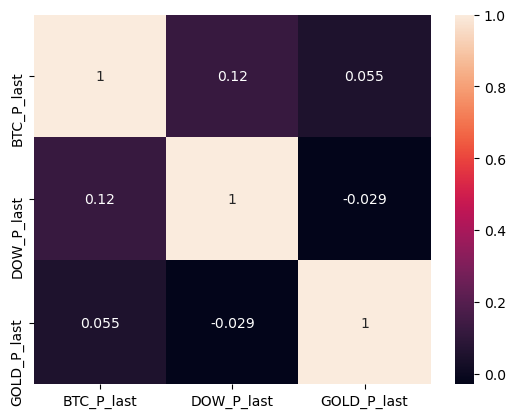

In [290]:
### LAST return CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = model_df_del_outline.filter(regex='last')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

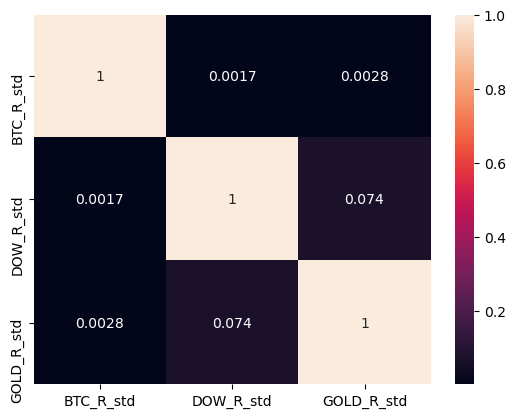

In [292]:
### vol return [on daily] CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = model_df_del_outline.filter(regex='std')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [309]:
ols_2 = OLS(model_df_del_outline.filter(regex='last').filter(regex='GOLD') , model_df_del_outline.filter(regex='last').filter(regex='DOW'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.4076
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.523
Time:                        18:49:16   Log-Likelihood:                          1162.7
No. Observations:                 540   AIC:                                     -2323.
Df Residuals:                     539   BIC:                                     -2319.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [310]:
from statsmodels.regression.linear_model import OLS


model_df_del_outline= concatenated_prep.dropna()

ols_1 = OLS(model_df_del_outline.filter(regex='last').filter(regex='BTC') , model_df_del_outline.filter(regex='last').filter(regex='DOW'))
results_1 = ols_1.fit()



print(results_1.summary())


                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              157.6
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    5.30e-32
Time:                        18:49:20   Log-Likelihood:                         -67.013
No. Observations:                 557   AIC:                                      136.0
Df Residuals:                     556   BIC:                                      140.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [311]:
e_1 = model_df_del_outline.filter(regex='last').filter(regex='BTC').iloc[:,0] - results_1.predict(model_df_del_outline.filter(regex='last').filter(regex='DOW')) 



ols_1e = OLS(e_1 , model_df_del_outline.filter(regex='last').filter(regex='GOLD'))
results_1e = ols_1e.fit()


print(results_1e.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              100.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    8.62e-22
Time:                        18:49:23   Log-Likelihood:                         -20.884
No. Observations:                 557   AIC:                                      43.77
Df Residuals:                     556   BIC:                                      48.09
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [312]:

ols_1e = OLS(e_1 ,   model_df_del_outline.filter(regex='last').filter(regex='GOLD') )
results_1e = ols_1e.fit()


print(results_1e.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              100.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    8.62e-22
Time:                        18:49:23   Log-Likelihood:                         -20.884
No. Observations:                 557   AIC:                                      43.77
Df Residuals:                     556   BIC:                                      48.09
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [313]:

ols_2 = OLS(model_df_del_outline.filter(regex='last').filter(regex='BTC') , model_df_del_outline.filter(regex='last').filter(regex='GOLD'))
results_2 = ols_2.fit()
print(results_2.summary())


                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.142
Model:                            OLS   Adj. R-squared (uncentered):              0.140
Method:                 Least Squares   F-statistic:                              91.83
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    3.11e-20
Time:                        18:49:24   Log-Likelihood:                         -93.942
No. Observations:                 557   AIC:                                      189.9
Df Residuals:                     556   BIC:                                      194.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [314]:

ols_2 = OLS(model_df_del_outline.filter(regex='last').filter(regex='GOLD') , model_df_del_outline.filter(regex='last').filter(regex='DOW'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              2.532
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.112
Time:                        18:49:25   Log-Likelihood:                          1063.7
No. Observations:                 557   AIC:                                     -2125.
Df Residuals:                     556   BIC:                                     -2121.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [315]:
ols_3 = OLS(model_df_del_outline.filter(regex='last').filter(regex='BTC') , model_df_del_outline.filter(regex='last')[[i for i in model_df_del_outline.filter(regex='last').columns if i not in model_df_del_outline.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())


                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.340
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              143.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    7.30e-51
Time:                        18:49:26   Log-Likelihood:                         -20.655
No. Observations:                 557   AIC:                                      45.31
Df Residuals:                     555   BIC:                                      53.96
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [321]:
model_df_del_outline.describe()

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,201566.511670,0.042954,0.003438,0.008080,0.000446,0.011724,0.000200,0.024265,0.002138,0.000600
std,310.844155,0.053692,0.021013,0.007427,0.004819,0.010048,0.005653,0.308498,0.030283,0.035948
min,201029.000000,0.000000,-0.112645,0.000399,-0.037996,0.000721,-0.020263,-4.045785,-0.206163,-0.319837
25%,201312.000000,0.017535,-0.004243,0.003885,-0.001521,0.005648,-0.002905,-0.031585,-0.008198,-0.015127
50%,201548.000000,0.029331,0.002286,0.006300,0.000691,0.008544,0.000280,0.014817,0.003092,0.001015
75%,201831.000000,0.048243,0.011298,0.009959,0.002802,0.013616,0.003013,0.079088,0.013771,0.015390
max,202113.000000,0.648919,0.099021,0.085420,0.029818,0.078691,0.024421,4.096705,0.247818,0.322914


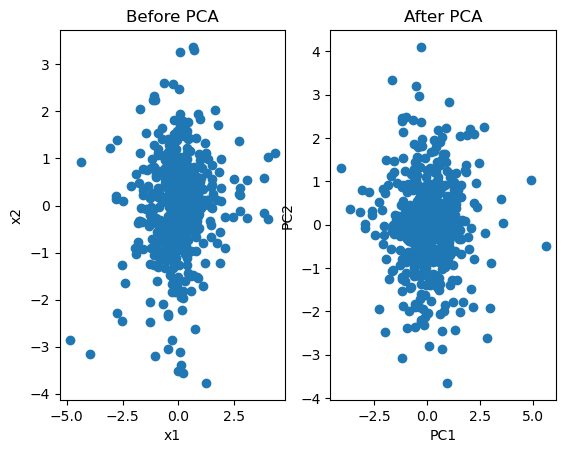

In [326]:


model_df_del_outline.filter(regex='last')



from sklearn.preprocessing import StandardScaler


x  = model_df_del_outline.filter(regex='last')
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)


fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [324]:

print(pca.explained_variance_ratio_)



model_df_del_outline.filter(regex='last').columns



[0.54539166 0.31094086]


Index(['BTC_P_last', 'DOW_P_last', 'GOLD_P_last'], dtype='object')

In [328]:
model_df_del_outline.describe()

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,201564.633333,0.041953,0.003425,0.007673,0.000479,0.011552,0.000167,0.022555,0.002209,0.000401
std,309.312108,0.052900,0.019548,0.005520,0.003992,0.009969,0.005510,0.140101,0.019452,0.028130
min,201029.000000,0.000000,-0.084234,0.000399,-0.014230,0.000721,-0.020263,-0.656780,-0.071149,-0.107680
25%,201312.750000,0.017080,-0.004000,0.003792,-0.001504,0.005581,-0.002890,-0.028884,-0.007489,-0.014488
50%,201547.500000,0.028874,0.002248,0.006299,0.000672,0.008397,0.000250,0.014587,0.003130,0.000971
75%,201828.250000,0.047506,0.011216,0.009901,0.002759,0.013504,0.002996,0.077279,0.013399,0.014629
max,202113.000000,0.648919,0.089801,0.046362,0.013555,0.078691,0.024421,0.628609,0.067776,0.122104


In [327]:


print(abs( pca.components_ ))




[[0.72545551 0.66803192 0.16567338]
 [0.15101434 0.38933795 0.90863118]]


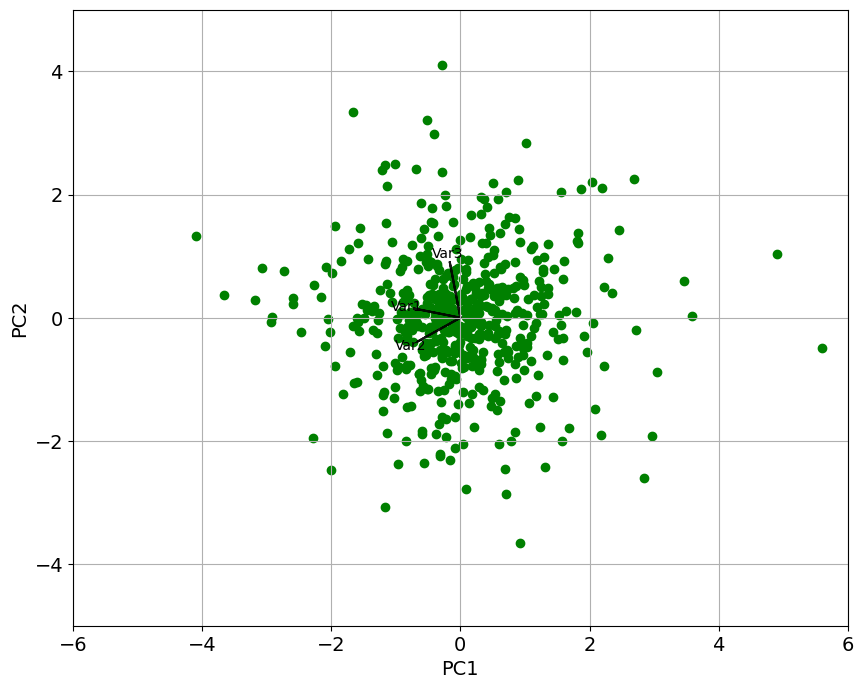

In [329]:

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()

In [ ]:
# weekly with lag

In [331]:
model_df['BTC_P_last_l1'] = model_df['BTC_P_last'].shift(1)
model_df['BTC_P_last_l2']= model_df['BTC_P_last'].shift(2)
model_df['BTC_P_last_l3']= model_df['BTC_P_last'].shift(3)
model_df['BTC_P_last_l4']= model_df['BTC_P_last'].shift(4)


model_df['DOW_P_last_l1']= model_df['DOW_P_last'].shift(1)
model_df['DOW_P_last_l2']= model_df['DOW_P_last'].shift(2)
model_df['DOW_P_last_l3']= model_df['DOW_P_last'].shift(3)
model_df['DOW_P_last_l4']= model_df['DOW_P_last'].shift(4)

model_df['GOLD_P_last_l1']= model_df['GOLD_P_last'].shift(1)
model_df['GOLD_P_last_l2']= model_df['GOLD_P_last'].shift(2)
model_df['GOLD_P_last_l3']= model_df['GOLD_P_last'].shift(3)
model_df['GOLD_P_last_l4']= model_df['GOLD_P_last'].shift(4)

<ipython-input-331-0c8224540dff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['BTC_P_last_l1'] = model_df['BTC_P_last'].shift(1)
<ipython-input-331-0c8224540dff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['BTC_P_last_l2']= model_df['BTC_P_last'].shift(2)
<ipython-input-331-0c8224540dff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [336]:
model_df2 = model_df.dropna()

In [332]:
# without delete outlier 

In [337]:
ols_3 = OLS(model_df2['BTC_P_last'] , model_df2.filter(regex='last')[[i for i in model_df2.filter(regex='last').columns if i not in model_df2.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.346
Method:                 Least Squares   F-statistic:                              30.20
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    2.86e-46
Time:                        19:17:53   Log-Likelihood:                         -15.264
No. Observations:                 553   AIC:                                      50.53
Df Residuals:                     543   BIC:                                      93.68
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [346]:
#version 1 2017 until now

In [347]:
model_df3 = model_df[model_df["par_week"] > 201700].dropna()

In [348]:
ols_3 = OLS(model_df3['BTC_P_last'] , model_df3.filter(regex='last')[[i for i in model_df3.filter(regex='last').columns if i not in model_df3.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.210
Model:                            OLS   Adj. R-squared (uncentered):              0.172
Method:                 Least Squares   F-statistic:                              5.604
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    2.05e-07
Time:                        20:52:09   Log-Likelihood:                          86.844
No. Observations:                 221   AIC:                                     -153.7
Df Residuals:                     211   BIC:                                     -119.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [351]:
model_df3

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last,...,BTC_P_last_l3,BTC_P_last_l4,DOW_P_last_l1,DOW_P_last_l2,DOW_P_last_l3,DOW_P_last_l4,GOLD_P_last_l1,GOLD_P_last_l2,GOLD_P_last_l3,GOLD_P_last_l4
340,201702,0.057780,-0.013233,0.003499,-0.000784,0.027631,-0.007097,-0.092628,-0.003918,-0.042584,...,0.027107,0.001955,-0.008626,0.004545,0.004372,0.030132,0.084033,-0.072956,-0.012292,-0.005165
341,201703,0.036165,0.016043,0.003841,-0.000736,0.034816,0.013783,0.112302,-0.002945,0.068913,...,0.121690,0.027107,-0.003918,-0.008626,0.004545,0.004372,-0.042584,0.084033,-0.072956,-0.012292
342,201704,0.015877,-0.000670,0.003938,0.002671,0.006644,-0.002733,-0.004691,0.013353,-0.013667,...,0.078012,0.121690,-0.002945,-0.003918,-0.008626,0.004545,0.068913,-0.042584,0.084033,-0.072956
343,201705,0.018906,0.015050,0.006230,-0.000222,0.005551,0.004740,0.105350,-0.001111,0.023701,...,-0.092628,0.078012,0.013353,-0.002945,-0.003918,-0.008626,-0.013667,0.068913,-0.042584,0.084033
344,201706,0.033892,-0.002783,0.003386,0.001962,0.004103,0.001880,-0.019478,0.009812,0.009401,...,0.112302,-0.092628,-0.001111,0.013353,-0.002945,-0.003918,0.023701,-0.013667,0.068913,-0.042584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,202109,0.045249,0.017311,0.014173,0.003613,0.006571,-0.003536,0.121178,0.018067,-0.017682,...,0.224733,0.160005,-0.018004,0.001141,0.009908,0.038140,-0.027724,-0.024262,0.004430,-0.020365
557,202110,0.034166,0.021141,0.005004,0.007981,0.012773,0.002492,0.147984,0.039907,0.012462,...,0.166117,0.224733,0.018067,-0.018004,0.001141,0.009908,-0.017682,-0.027724,-0.024262,0.004430
558,202111,0.030261,-0.004243,0.006021,-0.000921,0.003212,0.002531,-0.029701,-0.004607,0.012654,...,-0.240333,0.166117,0.039907,0.018067,-0.018004,0.001141,0.012462,-0.017682,-0.027724,-0.024262
559,202112,0.041489,-0.004087,0.008527,0.002709,0.005386,-0.001082,-0.028612,0.013544,-0.005412,...,0.121178,-0.240333,-0.004607,0.039907,0.018067,-0.018004,0.012654,0.012462,-0.017682,-0.027724


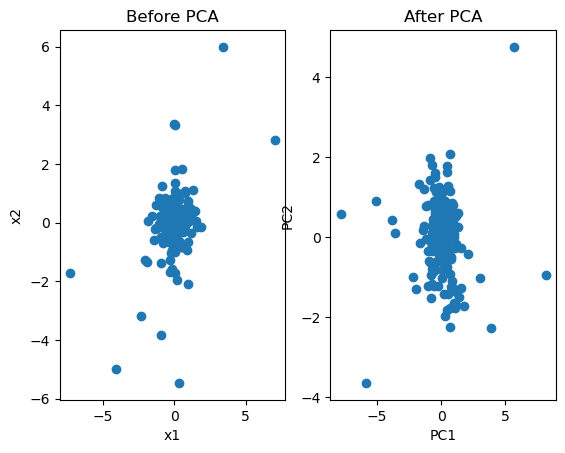

In [352]:




from sklearn.preprocessing import StandardScaler


x  = model_df3.filter(regex='last')[['BTC_P_last','DOW_P_last','GOLD_P_last']]
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)


fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

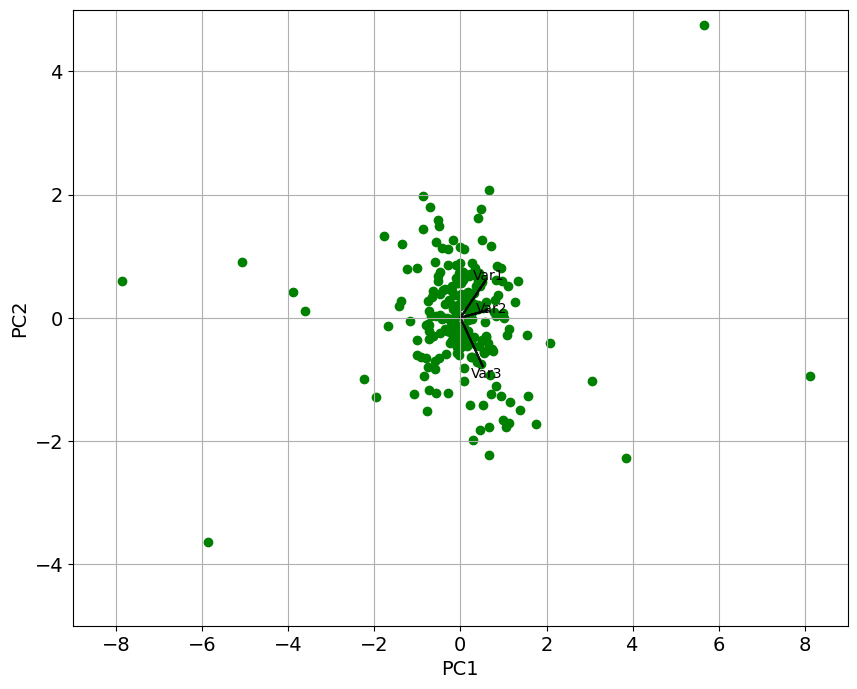

In [353]:

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()

In [ ]:
# Without outlier

In [354]:
model_df3_del_outline = model_df3[    (abs(model_df3['BTC_P_last']) 
         < abs(np.percentile(model_df3['BTC_P_last'], 99))   )     
        &
         (
             abs(model_df3['DOW_P_last']) 
         < abs(np.percentile(model_df3['DOW_P_last'], 99))
         )
         &
         (
         abs(model_df3['DOW_P_last']) 
         < abs(np.percentile(model_df3['GOLD_P_last'], 99))
         )
        
        
        ]


In [355]:
ols_3 = OLS(model_df3_del_outline['BTC_P_last'] , model_df3_del_outline.filter(regex='last')[[i for i in model_df3_del_outline.filter(regex='last').columns if i not in model_df3_del_outline.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.047
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.9760
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.466
Time:                        21:01:26   Log-Likelihood:                          166.62
No. Observations:                 210   AIC:                                     -313.2
Df Residuals:                     200   BIC:                                     -279.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

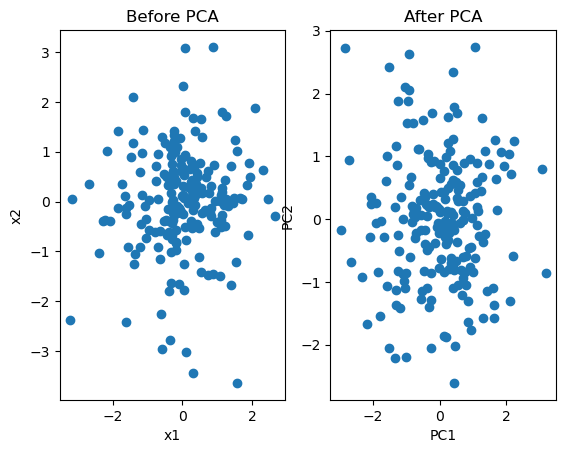

In [357]:



from sklearn.preprocessing import StandardScaler


x  = model_df3_del_outline.filter(regex='last')[['BTC_P_last','DOW_P_last','GOLD_P_last']]
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)


fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

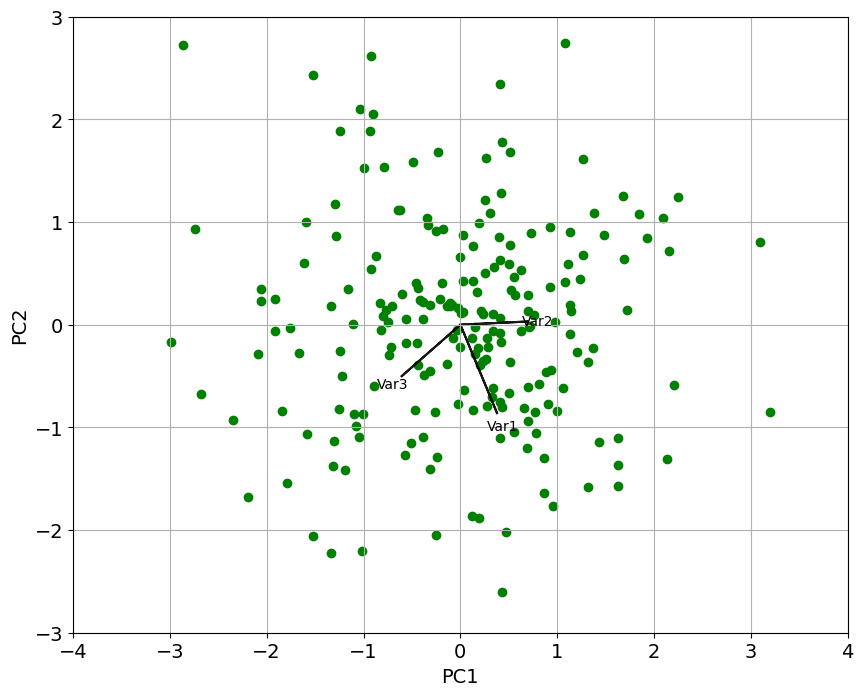

In [358]:

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()

# DONE VERSION 1 

In [340]:
#Version 2 